In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid")
import os.path

In [25]:
comment = """RUNNING - Initial EDA and Cleaning.
This script will run the initial cleaning and exploratory analysis 
and generate the following files - 
1. Plots for various analyses (png)
2. Final cleaned data files (csv)"""
print(comment)
from time import sleep
sleep(5)

RUNNING - Initial EDA and Cleaning.
This script will run the initial cleaning and exploratory analysis 
and generate the following files - 
1. Plots for various analyses (png)
2. Final cleaned data files (csv)


# Obtain Data

In [26]:
fpath = 'yelp_academic_dataset_business.csv'
business = pd.read_csv(fpath)

In [27]:
business.head()

,is_open,hours.Monday,attributes.BusinessAcceptsCreditCards,hours.Tuesday,attributes.HappyHour,attributes.Ambience,attributes.NoiseLevel,hours.Wednesday,attributes.GoodForKids,attributes.AgesAllowed,...,attributes.WheelchairAccessible,attributes.RestaurantsGoodForGroups,attributes.Smoking,attributes.CoatCheck,hours.Saturday,review_count,hours.Thursday,state,hours,attributes.RestaurantsAttire
0,1,8:30-17:0,True,11:0-21:0,NaN,NaN,average,11:0-21:0,True,NaN,...,NaN,True,NaN,NaN,11:0-21:0,24,11:0-21:0,AB,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",casual
1,0,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,...,True,True,NaN,NaN,17:0-23:0,3,NaN,NV,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",casual
2,0,10:0-22:0,False,10:0-22:0,NaN,"{'romantic': False, 'intimate': False, 'classy...",average,10:0-22:0,True,NaN,...,NaN,True,NaN,NaN,10:0-22:0,5,10:0-22:0,QC,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",casual
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8,NaN,AZ,NaN,NaN
4,1,8:0-17:0,True,8:0-17:0,NaN,NaN,NaN,8:0-17:0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4,8:0-17:0,AB,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",NaN


In [28]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 61 columns):
is_open                                  188593 non-null int64
hours.Monday                             132761 non-null object
attributes.BusinessAcceptsCreditCards    140391 non-null object
hours.Tuesday                            140607 non-null object
attributes.HappyHour                     9285 non-null object
attributes.Ambience                      47577 non-null object
attributes.NoiseLevel                    43710 non-null object
hours.Wednesday                          141843 non-null object
attributes.GoodForKids                   64931 non-null object
attributes.AgesAllowed                   397 non-null object
neighborhood                             68655 non-null object
attributes.Corkage                       657 non-null object
categories                               188052 non-null object
attributes.AcceptsInsurance              11671 non-null object
attribu

# Scrub and Explore

We will explore the following features for our study - 
1. Stars
- Is Open
- State
- City
- Review Count
- Name
- Neighborhood
- Postal Code
- Categories
- Latitude/Longitude
- Address

## 1. stars feature

In [29]:
business.stars.value_counts()

4.0    35123
3.5    33974
5.0    30941
4.5    26707
3.0    24704
2.5    17808
2.0    10266
1.5     4727
1.0     4343
Name: stars, dtype: int64

In [30]:
business.stars = business.stars.astype('category')

In [31]:
business.stars.describe()

count     188593.0
unique         9.0
top            4.0
freq       35123.0
Name: stars, dtype: float64

In [32]:
business.stars.dtype

CategoricalDtype(categories=[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], ordered=False)

No null values, all values spread among 9 categories

## 2. is_open feature

In [33]:
business.is_open.value_counts()

1    156606
0     31987
Name: is_open, dtype: int64

In [34]:
business[business.is_open == 0][['name','city','state']].head()

,name,city,state
1,CK'S BBQ & Catering,Henderson,NV
2,La Bastringue,Montréal,QC
6,Bnc Cake House,Toronto,ON
10,Sushi 8,Markham,ON
11,Southern Accent Restaurant,Toronto,ON


Validated that these business listings are closed. e.g. https://www.yelp.com/biz/cks-bbq-and-catering-henderson?osq=CK%27S+BBQ+%26+Catering
Only working with open businesses in this study.

In [35]:
business = business[business.is_open == 1]

## 3-4 state and city features

In [36]:
business.state.value_counts()

AZ     47168
NV     29232
ON     26031
NC     12196
OH     11742
PA      9296
QC      7290
AB      6486
WI      4168
IL      1574
SC       651
NYK      156
NI       118
IN        81
OR        57
BY        52
CO        42
ST        42
C         32
HE        31
XGM       22
NLK       22
NY        19
RP        18
01        11
CA         7
VS         7
O          3
NW         3
6          3
       ...  
AL         2
B          2
WHT        1
FL         1
NE         1
TAM        1
SP         1
CC         1
MN         1
LU         1
HH         1
11         1
HU         1
RCC        1
4          1
45         1
VA         1
MA         1
KY         1
BC         1
WAR        1
WA         1
DE         1
CS         1
XMS        1
AG         1
PO         1
CRF        1
GA         1
10         1
Name: state, Length: 67, dtype: int64

In [37]:
business[business.state == 'CA'][['name','city', 'state']]

,name,city,state
26737,La Chamade,Montreal,CA
32452,Hatchtag,Las Vegas,CA
48232,"Tiffany Rogers, MD, M.P.T",Suite 120,CA
56775,Casa Bonita Green Cleaning,Pittsburgh,CA
72894,Viva Las Vegas Rockabilly Weekend,Las Vegas,CA
136486,Makeup By Kassandra Franco,Las Vegas Nv,CA
163678,Natural Bridge Canyon,Las Vegas,CA


A lot of invalid data. More than 50 states. Las Vegas shown as in CA.

### Problem 1 - More than 50 states

https://statetable.com/

In [38]:
true_states = pd.read_csv('state_table.csv')

In [39]:
true_states.head()

,id,name,abbreviation,country,type,sort,status,occupied,notes,fips_state,assoc_press,standard_federal_region,census_region,census_region_name,census_division,census_division_name,circuit_court
0,1,Alabama,AL,USA,state,10,current,occupied,NaN,1.0,Ala.,IV,3.0,South,6.0,East South Central,11
1,2,Alaska,AK,USA,state,10,current,occupied,NaN,2.0,Alaska,X,4.0,West,9.0,Pacific,9
2,3,Arizona,AZ,USA,state,10,current,occupied,NaN,4.0,Ariz.,IX,4.0,West,8.0,Mountain,9
3,4,Arkansas,AR,USA,state,10,current,occupied,NaN,5.0,Ark.,VI,3.0,South,7.0,West South Central,8
4,5,California,CA,USA,state,10,current,occupied,NaN,6.0,Calif.,IX,4.0,West,9.0,Pacific,9


In [40]:
true_states = true_states[['name','abbreviation','country','census_region','census_division']]

In [41]:
true_states = true_states.rename(index=str, columns={"name" : "state_full", "abbreviation" : "true_state"})

In [42]:
true_states.head()

,state_full,true_state,country,census_region,census_division
0,Alabama,AL,USA,3.0,6.0
1,Alaska,AK,USA,4.0,9.0
2,Arizona,AZ,USA,4.0,8.0
3,Arkansas,AR,USA,3.0,7.0
4,California,CA,USA,4.0,9.0


In [43]:
business = pd.merge(business, true_states, left_on='state', right_on='true_state', how='left')

In [44]:
business.head()

,is_open,hours.Monday,attributes.BusinessAcceptsCreditCards,hours.Tuesday,attributes.HappyHour,attributes.Ambience,attributes.NoiseLevel,hours.Wednesday,attributes.GoodForKids,attributes.AgesAllowed,...,review_count,hours.Thursday,state,hours,attributes.RestaurantsAttire,state_full,true_state,country,census_region,census_division
0,1,8:30-17:0,True,11:0-21:0,NaN,NaN,average,11:0-21:0,True,NaN,...,24,11:0-21:0,AB,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",casual,Alberta,AB,Canada,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8,NaN,AZ,NaN,NaN,Arizona,AZ,USA,4.0,8.0
2,1,8:0-17:0,True,8:0-17:0,NaN,NaN,NaN,8:0-17:0,NaN,NaN,...,4,8:0-17:0,AB,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",NaN,Alberta,AB,Canada,NaN,NaN
3,1,5:30-20:0,True,5:30-20:0,NaN,NaN,NaN,5:30-20:0,NaN,NaN,...,63,5:30-20:0,AZ,"{'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'...",NaN,Arizona,AZ,USA,4.0,8.0
4,1,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,...,7,NaN,ON,NaN,casual,Ontario,ON,Canada,NaN,NaN


In [45]:
business[business.true_state.isna()][['address','city', 'state']].head(15)

,address,city,state
224,Esplanade,Scarborough,NYK
262,Seamer Road,Scarborough,NYK
1015,Church Street,Whitby,NYK
1450,Av. Maipu 2320,Olivos,C
1530,Rosengasse 4,Lam,BY
1614,214/215 Ashley Road,Trafford,XGM
1796,Waldkater 1,Thale,ST
1988,Edenkobenerstr. 38,St Martin,RP
2475,10 Sandside,Scarborough,NYK
2509,"6 Cecil Road, Hale",Trafford,XGM


Looks like these are businesses that are probably outside North America and since there are just 590 of them, dropping them from our analysis.

In [46]:
business = business[pd.notnull(business.true_state)]

In [47]:
business.country.value_counts()

USA       116250
Canada     39808
Name: country, dtype: int64

For the sake of simplicity, keeping the study just to USA.

In [48]:
business = business[business.country == 'USA']

In [49]:
business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116250 entries, 1 to 156605
Data columns (total 66 columns):
is_open                                  116250 non-null int64
hours.Monday                             88221 non-null object
attributes.BusinessAcceptsCreditCards    91682 non-null object
hours.Tuesday                            91915 non-null object
attributes.HappyHour                     4928 non-null object
attributes.Ambience                      22337 non-null object
attributes.NoiseLevel                    19810 non-null object
hours.Wednesday                          92410 non-null object
attributes.GoodForKids                   32013 non-null object
attributes.AgesAllowed                   154 non-null object
neighborhood                             33043 non-null object
attributes.Corkage                       429 non-null object
categories                               115856 non-null object
attributes.AcceptsInsurance              9926 non-null object
attributes.A

In [50]:
business = business.drop(['state_full','true_state','country'], axis=1)

### Problem 2 - Wrong City/State combination

https://simplemaps.com/data/us-cities

In [51]:
cities = pd.read_csv('uscitiesv1.4.csv')

In [52]:
cities.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id
0,Prairie Ridge,Prairie Ridge,WA,Washington,53053,Pierce,47.1443,-122.1408,NaN,NaN,1349.8,polygon,False,America/Los_Angeles,98360 98391,1840037882
1,Edison,Edison,WA,Washington,53057,Skagit,48.5602,-122.4311,NaN,NaN,127.4,polygon,False,America/Los_Angeles,98232,1840017314
2,Packwood,Packwood,WA,Washington,53041,Lewis,46.6085,-121.6702,NaN,NaN,213.9,polygon,False,America/Los_Angeles,98361,1840025265
3,Wautauga Beach,Wautauga Beach,WA,Washington,53035,Kitsap,47.5862,-122.5482,NaN,NaN,261.7,point,False,America/Los_Angeles,98366,1840037725
4,Harper,Harper,WA,Washington,53035,Kitsap,47.5207,-122.5196,NaN,NaN,342.1,point,False,America/Los_Angeles,98366,1840037659


In [53]:
cities.city = cities.city.str.lower()

In [54]:
cities = cities.drop(['city_ascii','county_fips','lat','lng','source','incorporated','timezone','id'], axis=1)

In [55]:
business[['city','state']].head()

,city,state
1,Phoenix,AZ
3,Phoenix,AZ
5,Avondale,AZ
6,Pittsburgh,PA
7,Phoenix,AZ


In [56]:
business.city = business.city.str.lower()

In [57]:
business = pd.merge(business, cities, left_on=['city','state'], right_on=['city','state_id'], how='left')

In [58]:
business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116250 entries, 0 to 116249
Data columns (total 70 columns):
is_open                                  116250 non-null int64
hours.Monday                             88221 non-null object
attributes.BusinessAcceptsCreditCards    91682 non-null object
hours.Tuesday                            91915 non-null object
attributes.HappyHour                     4928 non-null object
attributes.Ambience                      22337 non-null object
attributes.NoiseLevel                    19810 non-null object
hours.Wednesday                          92410 non-null object
attributes.GoodForKids                   32013 non-null object
attributes.AgesAllowed                   154 non-null object
neighborhood                             33043 non-null object
attributes.Corkage                       429 non-null object
categories                               115856 non-null object
attributes.AcceptsInsurance              9926 non-null object
attributes.A

In [59]:
business[business.state_id.isna()][['city','state']].head()

,city,state
23,upper st clair,PA
116,laveen village,AZ
263,maricopa county,AZ
265,waddell,AZ
327,moon twp,PA


In [60]:
business[business.state == 'CA'][['city','state_id','state']]

,city,state_id,state
15775,montreal,NaN,CA
19158,las vegas,NaN,CA
28948,suite 120,NaN,CA
34174,pittsburgh,NaN,CA
43839,las vegas,NaN,CA
83363,las vegas nv,NaN,CA
100454,las vegas,NaN,CA


There are some obvious errors like marking Las Vegas in CA or marking Charlotte as in South Carolina and some typos like 'pittsburg' instead of 'pittsburgh'. Instead of going into fixing the errors, we will drop these very few rows for now. 

In [61]:
business = business[pd.notnull(business.state_id)]

In [62]:
business = business.drop(['state_id'], axis=1)

In [63]:
business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115118 entries, 0 to 116249
Data columns (total 69 columns):
is_open                                  115118 non-null int64
hours.Monday                             87417 non-null object
attributes.BusinessAcceptsCreditCards    90809 non-null object
hours.Tuesday                            91076 non-null object
attributes.HappyHour                     4867 non-null object
attributes.Ambience                      22072 non-null object
attributes.NoiseLevel                    19579 non-null object
hours.Wednesday                          91564 non-null object
attributes.GoodForKids                   31607 non-null object
attributes.AgesAllowed                   152 non-null object
neighborhood                             32945 non-null object
attributes.Corkage                       427 non-null object
categories                               114726 non-null object
attributes.AcceptsInsurance              9888 non-null object
attributes.A

In [64]:
business.city.isnull().value_counts()

False    115118
Name: city, dtype: int64

In [65]:
business.state.isnull().value_counts()

False    115118
Name: state, dtype: int64

In [66]:
business.city.value_counts()

las vegas           23562
phoenix             15469
charlotte            7740
scottsdale           7138
pittsburgh           5613
mesa                 5469
henderson            3982
tempe                3569
chandler             3518
gilbert              2937
glendale             2928
cleveland            2893
madison              2843
peoria               1631
north las vegas      1285
champaign             996
surprise              984
concord               745
goodyear              732
matthews              598
avondale              567
huntersville          526
fort mill             520
gastonia              450
lakewood              415
mentor                395
cornelius             388
cave creek            340
monroeville           337
urbana                322
                    ...  
mooers                  1
ranlo                   1
ingram                  1
paw creek               1
harwick                 1
larimer                 1
bratenahl               1
fox chapel  

## 5. review_count feature

In [67]:
business.review_count.describe()

count    115118.000000
mean         38.221382
std         124.272411
min           3.000000
25%           4.000000
50%          10.000000
75%          28.000000
max        7968.000000
Name: review_count, dtype: float64

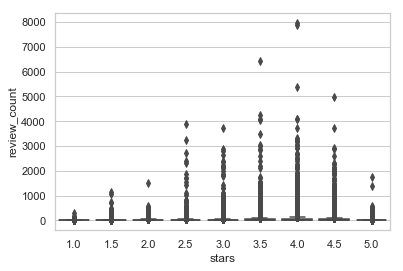

In [68]:
sns_plot = sns.boxplot(x = "stars", y = "review_count", data=business)
sns_plot.figure.savefig("review-count-boxplot.png")

/Users/amangal/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


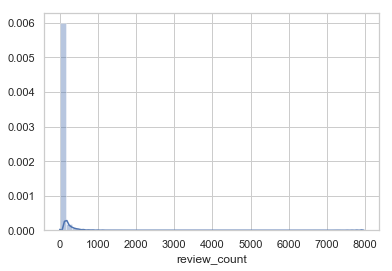

In [69]:
sns_plot = sns.distplot(business.review_count)
sns_plot.figure.savefig("review-count-distplot.png")

In [70]:
business.review_count.quantile([.75, .9, .95, .99, .999, .9999])

0.7500      28.0000
0.9000      80.0000
0.9500     151.0000
0.9900     459.0000
0.9990    1555.6490
0.9999    3736.8596
Name: review_count, dtype: float64

In [71]:
business.review_count.skew()

17.42100553694458

There's heavy positive skew in the review_count feature, lets see if this valid data or not.

In [72]:
business.sort_values(by=['review_count'], ascending=False).iloc[0]

is_open                                                                                  1
hours.Monday                                                                      7:0-23:0
attributes.BusinessAcceptsCreditCards                                                 True
hours.Tuesday                                                                     7:0-23:0
attributes.HappyHour                                                                   NaN
attributes.Ambience                      {'romantic': True, 'intimate': False, 'classy'...
attributes.NoiseLevel                                                              average
hours.Wednesday                                                                   7:0-23:0
attributes.GoodForKids                                                                True
attributes.AgesAllowed                                                                 NaN
neighborhood                                                                     The Strip

Manually validated from yelp the top few businesses and their corresponding review counts. Looks good. Lets see if we can transform the feature to make it more gaussian and better distributed

/Users/amangal/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


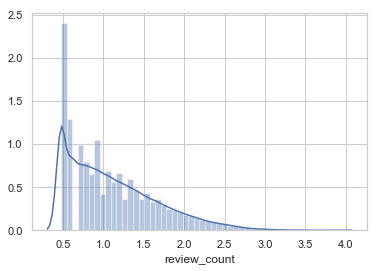

In [73]:
sns_plot = sns.distplot(np.log10(business.review_count))
sns_plot.figure.savefig("log-review-count-distplot.png")

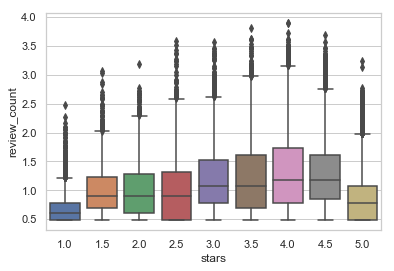

In [74]:
sns_plot = sns.boxplot(x=business.stars, y=np.log10(business.review_count))
sns_plot.figure.savefig("log-review-count-boxplot.png")

As we see above, there are usually lesser number of reviews for very low and very high ratings. The inter-quartile range is similar for each of them which implies people generally have concensus on a business' star ratings. The more common star ratings, i.e. 3-4.5 have higher median number of review counts. 

In [55]:
np.log10(business.review_count).skew()

0.9148509346237852

Log10 transform of review counts looks like a good valid feature to have. Keeping the transform. Making sure correlation with 'stars' remains unaffected before doing the transform.

In [56]:
business.stars.corr(business.review_count)

0.021186980095157702

In [57]:
business.stars.corr(np.log10(business.review_count))

0.024090286842396055

In [58]:
business.review_count = np.log10(business.review_count)

In [59]:
business.review_count.isnull().value_counts()

False    115118
Name: review_count, dtype: int64

## 6. name feature

In [60]:
business.name.head()

0               Geico Insurance
1    The Coffee Bean & Tea Leaf
2      Filiberto's Mexican Food
3       Maggie & Stella's Gifts
4      Original Hamburger Works
Name: name, dtype: object

In [61]:
business.name.isnull().value_counts()

False    115118
Name: name, dtype: int64

In [62]:
business.name = business.name.str.lower()

## 7. neighborhood feature

In [63]:
business.neighborhood.head()

0        NaN
1        NaN
2        NaN
3    Oakland
4        NaN
Name: neighborhood, dtype: object

In [64]:
business[['city','neighborhood','address','name','postal_code']].head()

,city,neighborhood,address,name,postal_code
0,phoenix,NaN,211 W Monroe St,geico insurance,85003
1,phoenix,NaN,"20235 N Cave Creek Rd, Ste 1115",the coffee bean & tea leaf,85024
2,avondale,NaN,1440 N. Dysart Ave,filiberto's mexican food,85323
3,pittsburgh,Oakland,209 Oakland Ave,maggie & stella's gifts,15213
4,phoenix,NaN,2801 N 15th Ave,original hamburger works,85007


In [65]:
business.neighborhood.isnull().value_counts()

True     82173
False    32945
Name: neighborhood, dtype: int64

In [66]:
business.groupby(['city','neighborhood'])['business_id'].count()

city            neighborhood     
aspinwall       Aspinwall             15
avalon          Avalon                 4
                Bellevue               1
bainbridge      Riverside              1
bellevue        Bellevue              28
ben avon        Ben Avon               1
boulder city    Southeast              1
                Spring Valley          1
brook park      Riverside              1
brooklyn        Brooklyn Acres         2
                Cascade Crossing      17
                Old Brooklyn           1
                Ridge & Memphis        6
carnegie        Carnegie              52
                East Carnegie          2
                Greentree              2
charlotte       Arboretum             89
                Ballantyne           480
                Biddleville           54
                Cotswold             143
                Derita               121
                Dilworth             171
                Eastland             388
                Elizabe

Instead of replacing neighborhoods with the most common neighborhood, I'm replacing NAs with a generic 'NOT_AVAILABLE' value.

In [67]:
business.neighborhood = business.neighborhood.fillna('NOT_AVAILABLE')

In [68]:
business.neighborhood = business.neighborhood.str.lower()

In [69]:
business.neighborhood.isnull().value_counts()

False    115118
Name: neighborhood, dtype: int64

## 8. postal_code feature

In [70]:
business.postal_code.head()

0    85003
1    85024
2    85323
3    15213
4    85007
Name: postal_code, dtype: object

In [71]:
business.postal_code.isnull().value_counts()

False    114753
True        365
Name: postal_code, dtype: int64

In [72]:
business[business.postal_code.isnull()][['name','address', 'city', 'state']].head()

,name,address,city,state
1421,cvs pharmacy,S Gilbert Rd,chandler,AZ
1494,dan the honeyman,NaN,peoria,AZ
1835,advantage brands,NaN,phoenix,AZ
2373,rosa mexicano,Archdale Dr,charlotte,NC
3632,xtreme cleaning az,NaN,phoenix,AZ


Checked on Yelp, looks like the businesses with NaN addresses actually have address missing on Yelp. e.g. https://www.yelp.com/biz/xtreme-cleaning-az-phoenix-2?osq=Xtreme+Cleaning+AZ

In [73]:
business[pd.notnull(business.address) & business.postal_code.isnull()][['name','address', 'city', 'state']].head()

,name,address,city,state
1421,cvs pharmacy,S Gilbert Rd,chandler,AZ
2373,rosa mexicano,Archdale Dr,charlotte,NC
7513,monroe street farmer's market,2219 Monroe St,madison,WI
18691,barkingham park,2900 Reedy Creek Park Rd,charlotte,NC
19091,menchies,Detroit Rd,avon,OH


Even the rows where address is not NaN, there are postal_code missing for these listings on Yelp. e.g. https://www.yelp.com/biz/monroe-street-farmers-market-madison?osq=Monroe+Street+Farmer%27s+Market. Replacing all NaN values with 'NOT_AVAILABLE'

In [74]:
business.postal_code = business.postal_code.fillna('NOT_AVAILABLE')

In [75]:
business.postal_code = business.postal_code.str.lower()

In [76]:
business.postal_code.isnull().value_counts()

False    115118
Name: postal_code, dtype: int64

## 9. categories feature

In [77]:
business.categories.head()

0                        Insurance, Financial Services
1                                   Coffee & Tea, Food
2                                 Mexican, Restaurants
3                Flowers & Gifts, Gift Shops, Shopping
4    Bars, Sports Bars, Dive Bars, Burgers, Nightli...
Name: categories, dtype: object

In [78]:
business.categories.isnull().value_counts()

False    114726
True        392
Name: categories, dtype: int64

In [79]:
business[business.categories.isnull()][['name','city','state']].head()

,name,city,state
348,fuzziwigs candy factory,glendale,AZ
636,center for effective living,rocky river,OH
686,a l financial,phoenix,AZ
1092,ray's,dallas,NC
1556,vista grove prep academy,mesa,AZ


Dropping 392 rows with Null categories.

In [80]:
business = business[pd.notnull(business.categories)]

In [81]:
business.categories = business.categories.str.lower()

In [82]:
business.categories.str.contains('restaurant|food').value_counts()

False    82964
True     31762
Name: categories, dtype: int64

Keeping only food/restaurant related listings for our study.

In [83]:
business = business[business.categories.str.contains('restaurant|food')]

## 10. latitude/longitude feature

In [84]:
business.latitude.isnull().value_counts()

False    31761
True         1
Name: latitude, dtype: int64

In [85]:
business.longitude.isnull().value_counts()

False    31762
Name: longitude, dtype: int64

In [86]:
business[business.longitude.isnull()]['latitude']

Series([], Name: latitude, dtype: float64)

In [87]:
business[business.latitude.isnull()]['longitude']

95254   -115.154606
Name: longitude, dtype: float64

In [88]:
business = business[pd.notnull(business.latitude) & pd.notnull(business.longitude)]

In [89]:
business[['latitude','longitude']].describe()

,latitude,longitude
count,31761.000000,31761.000000
mean,36.863435,-98.616598
std,3.315280,15.789453
min,-33.508570,-122.823162
25%,33.598879,-112.235082
50%,36.063274,-111.773404
75%,40.446084,-81.214690
max,44.999192,79.946718


Got the bounding box i.e. max/min lat longs for continental United States from here - https://en.wikipedia.org/wiki/List_of_extreme_points_of_the_United_States

In [90]:
top = 49.3457868 # north lat
left = -124.7844079 # west long
right = -66.9513812 # east long
bottom =  24.7433195 # south lat

In [91]:
business[(business.latitude > top) | (business.latitude < bottom) | (business.longitude > right) | (business.longitude < left)][['name','city','state']]

,name,city,state
35544,k asian bistro,allison park,PA
48607,rustico restaurant and pizzeria,pittsburgh,PA
60318,city market deli & catering,phoenix,AZ


There are about 12 business who's latitude/longitude fall outside the bounding box of continental USA. Dropping them

In [92]:
business = business[(business.latitude <= top) & (business.latitude >= bottom) & (business.longitude<=right) & (business.longitude>=left)]

## 11. Address

In [93]:
business.address.isnull().value_counts()

False    31241
True       517
Name: address, dtype: int64

In [94]:
business[business.address.isnull()][['name','address','city','state']].head()

,name,address,city,state
62,tipsy ryde,NaN,gastonia,NC
455,doghaus cafe,NaN,san tan valley,AZ
503,hungry street grille,NaN,phoenix,AZ
889,arizona event catering,NaN,mesa,AZ
1006,grouchy john's coffee truck,NaN,las vegas,NV


As we see a lot of the places above with null address are actually mobile restaurants, like food trucks etc. Marking all these addresses as 'NOT_AVAILABLE'.

In [95]:
business.address = business.address.fillna('NOT_AVAILABLE')

In [96]:
business.address = business.address.str.lower()

In [97]:
business.address.isnull().value_counts()

False    31758
Name: address, dtype: int64

# Join Data

## Joining with tip data

Get all user_ids that provided tips for this business

In [100]:
tip = pd.read_csv('yelp_academic_dataset_tip.csv')

In [102]:
tip.head()

,likes,business_id,user_id,date,text
0,0,tJRDll5yqpZwehenzE2cSg,zcTZk7OG8ovAmh_fenH21g,2012-07-15,Get here early enough to have dinner.
1,0,2ThtBbeDqFkVi6LugUOcVA,M5n8mMFoeXjnJEV2gxyGGA,2012-11-25,Don't use them! Double charged my boyfriend an...
2,0,jH19V2I9fIslnNhDzPmdkA,ZcLKXikTHYOnYt5VYRO5sg,2015-08-12,Great breakfast large portions and friendly wa...
3,0,dAa0hB2yrnHzVmsCkN4YvQ,oaYhjqBbh18ZhU0bpyzSuw,2014-06-20,Nice place. Great staff. A fixture in the tow...
4,0,dAa0hB2yrnHzVmsCkN4YvQ,ulQ8Nyj7jCUR8M83SUMoRQ,2016-10-12,Happy hour 5-7 Monday - Friday


In [105]:
business = business.merge(tip[['business_id','user_id']], left_on='business_id', right_on='business_id', how='left')

In [110]:
business = business.merge(business.groupby('business_id').apply(lambda x: x['user_id'].unique()).reset_index(), 
               left_on='business_id', right_on='business_id', how='left')

In [118]:
business = business.drop_duplicates(subset='business_id')

In [121]:
business['users'] = business[0]

/Users/amangal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
business = business.drop(['user_id',0], axis=1)

## Joining with review data

Get all user_ids that provided reviews for this business

In [125]:
review = pd.read_csv('yelp_academic_dataset_review.csv')

In [127]:
review.head()

,stars,useful,date,review_id,business_id,cool,text,user_id,funny
0,2,0,2011-02-25,x7mDIiDB3jEiPGPHOmDzyw,iCQpiavjjPzJ5_3gPD5Ebg,0,The pizza was okay. Not the best I've had. I p...,msQe1u7Z_XuqjGoqhB0J5g,0
1,5,0,2012-11-13,dDl8zu1vWPdKGihJrwQbpw,pomGBqfbxcqPv14c3XH-ZQ,0,I love this place! My fiance And I go here atl...,msQe1u7Z_XuqjGoqhB0J5g,0
2,1,3,2014-10-23,LZp4UX5zK3e-c5ZGSeo3kA,jtQARsP6P-LbkyjbO1qNGg,1,Terrible. Dry corn bread. Rib tips were all fa...,msQe1u7Z_XuqjGoqhB0J5g,1
3,2,2,2011-02-25,Er4NBWCmCD4nM8_p1GRdow,elqbBhBfElMNSrjFqW3now,0,Back in 2005-2007 this place was my FAVORITE t...,msQe1u7Z_XuqjGoqhB0J5g,0
4,5,0,2014-09-05,jsDu6QEJHbwP2Blom1PLCA,Ums3gaP2qM3W1XcA5r6SsQ,0,Delicious healthy food. The steak is amazing. ...,msQe1u7Z_XuqjGoqhB0J5g,0


In [128]:
business = business.merge(review[['business_id','user_id']], left_on='business_id', right_on='business_id', how='left')

In [131]:
business = business.merge(business.groupby('business_id').apply(lambda x: x['user_id'].unique()).reset_index(), 
               left_on='business_id', right_on='business_id', how='left')

In [132]:
business = business.drop_duplicates(subset='business_id')

In [135]:
business['users2'] = business[0]

In [137]:
business = business.drop(['user_id',0], axis=1)

In [155]:
business = business.reset_index(drop=True)

## Union of all users interacting with this business

In [171]:
def union(x):
    a = x['users']
    b = x['users2']
    return list(set(a) | set(b))

In [173]:
business.users = business.apply(union, axis=1)

In [176]:
business = business.drop(['users2'], axis=1)

## Joining user profiles with business

In [177]:
users = pd.read_csv('yelp_academic_dataset_user.csv')

In [212]:
users.head()

,elite,fans,compliment_writer,cool,compliment_photos,friends,compliment_hot,compliment_note,yelping_since,compliment_plain,...,compliment_profile,compliment_list,funny,review_count,name,compliment_cute,user_id,compliment_cool,average_stars,months_since_yelping
0,None,0,0,0,0,None,0,0,2015-09-28,0,...,0,0,0,1,Susan,0,lzlZwIpuSWXEnNS91wxjHw,0,2.00,38.033063
1,None,0,0,0,0,None,0,0,2015-09-05,0,...,0,0,0,2,Daipayan,0,XvLBr-9smbI0m_a7dXtB7w,0,5.00,38.788725
2,None,0,0,0,0,None,0,0,2016-07-21,0,...,0,0,0,1,Andy,0,QPT4Ud4H5sJVr68yXhoWFw,0,4.00,28.275162
3,None,0,0,0,0,None,0,0,2014-08-04,0,...,0,0,0,19,Jonathan,0,i5YitlHZpf0B3R0s_8NVuw,0,4.05,51.832114
4,None,0,0,0,0,None,0,0,2017-06-18,0,...,0,0,0,3,Shashank,0,s4FoIXE_LSGviTHBe8dmcg,0,3.00,17.367341


In [205]:
users.yelping_since = users.yelping_since.astype(np.datetime64)

In [218]:
users['months_since_yelping'] = ((pd.to_datetime('today') - users.yelping_since)/np.timedelta64(1, 'M'))

In [221]:
users.columns

Index(['elite', 'fans', 'compliment_writer', 'cool', 'compliment_photos',
       'friends', 'compliment_hot', 'compliment_note', 'yelping_since',
       'compliment_plain', 'useful', 'compliment_more', 'compliment_funny',
       'compliment_profile', 'compliment_list', 'funny', 'review_count',
       'name', 'compliment_cute', 'user_id', 'compliment_cool',
       'average_stars', 'months_since_yelping'],
      dtype='object')

In [243]:
users['total_compliments'] = users[users.columns[users.columns.to_series().str.contains('compliment')]].sum(axis=1)

In [244]:
def get_user_stats(x):
    data = users[users.user_id.isin(x['users'])]
    result = x[['business_id']]
    result['mean_user_review_counts'] = data.review_count.mean()
    result['mean_months_since_yelping'] = data.months_since_yelping.mean()
    result['mean_user_fans'] = data.fans.mean()
    result['mean_total_compliments'] = data.total_compliments.mean()
    return result

In [247]:
business = business.merge(business.apply(get_user_stats, axis=1), left_on='business_id', right_on='business_id', how='left')

In [250]:
business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31758 entries, 0 to 31757
Data columns (total 74 columns):
is_open                                  31758 non-null int64
hours.Monday                             24429 non-null object
attributes.BusinessAcceptsCreditCards    30325 non-null object
hours.Tuesday                            25478 non-null object
attributes.HappyHour                     3476 non-null object
attributes.Ambience                      20660 non-null object
attributes.NoiseLevel                    18368 non-null object
hours.Wednesday                          25755 non-null object
attributes.GoodForKids                   21882 non-null object
attributes.AgesAllowed                   32 non-null object
neighborhood                             31758 non-null object
attributes.Corkage                       427 non-null object
categories                               31758 non-null object
attributes.AcceptsInsurance              92 non-null object
attributes.Alcohol 

# Writing out cleaned data

In [251]:
cleaned_cols = ['stars', 'business_id', 'name', 'neighborhood',
               'city', 'state', 'postal_code', 'latitude', 'longitude',
               'categories', 'review_count', 'mean_user_review_counts', 
                'mean_months_since_yelping', 'mean_user_fans', 'mean_total_compliments']

In [252]:
business[cleaned_cols].head()

,stars,business_id,name,neighborhood,city,state,postal_code,latitude,longitude,categories,review_count,mean_user_review_counts,mean_months_since_yelping,mean_user_fans,mean_total_compliments
0,4.0,45bWSZtniwPRiqlivpS8Og,the coffee bean & tea leaf,not_available,phoenix,AZ,85024,33.671375,-112.030017,"coffee & tea, food",1.799341,71.855422,79.254341,8.807229,77.325301
1,2.5,8-NRKkPY1UiFXW20WXKiXg,filiberto's mexican food,not_available,avondale,AZ,85323,33.448106,-112.341302,"mexican, restaurants",1.602060,96.235294,82.525937,5.960784,58.196078
2,4.0,_c3ixq9jYKxhLUB0czi0ug,original hamburger works,not_available,phoenix,AZ,85007,33.479807,-112.091188,"bars, sports bars, dive bars, burgers, nightli...",2.442480,107.390244,83.152809,9.634146,144.167683
3,3.0,gJ5xSt6147gkcZ9Es0WxlA,rally's hamburgers,central,cleveland,OH,44115,41.499989,-81.666375,"fast food, burgers, restaurants",0.698970,25.166667,36.790327,0.833333,2.333333
4,2.5,3ByGQOVgds2YEu6kzl-XEQ,rib shop,not_available,phoenix,AZ,85033,33.495298,-112.236076,"nightlife, bars, american (traditional), sport...",0.477121,159.750000,79.200507,28.250000,546.250000


In [253]:
business[cleaned_cols].to_csv('1.0-sm-business_cleaned-1.csv', index=False)

In [254]:
business.to_csv('1.0-sm-business_cleaned-raw.csv', index=False)